In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [19]:
# df = pd.read_csv("selected_data.csv")

df = pd.read_csv("merged_2022_withbean.csv")



# df['PRICE'] = df.Price
print('데이타셋 크기 :', df.shape)
df.head(2)

데이타셋 크기 : (246, 10)


,index_x,Price,Month,PRCP,TMAX,TMIN,TOBS,Seq,index_y,Bean_Price
0,0,5.72,1,0.0,1.0,-9.0,-9.0,1,0,13.0389
1,1,5.72,1,0.0,15.0,-9.0,4.0,2,1,13.3738


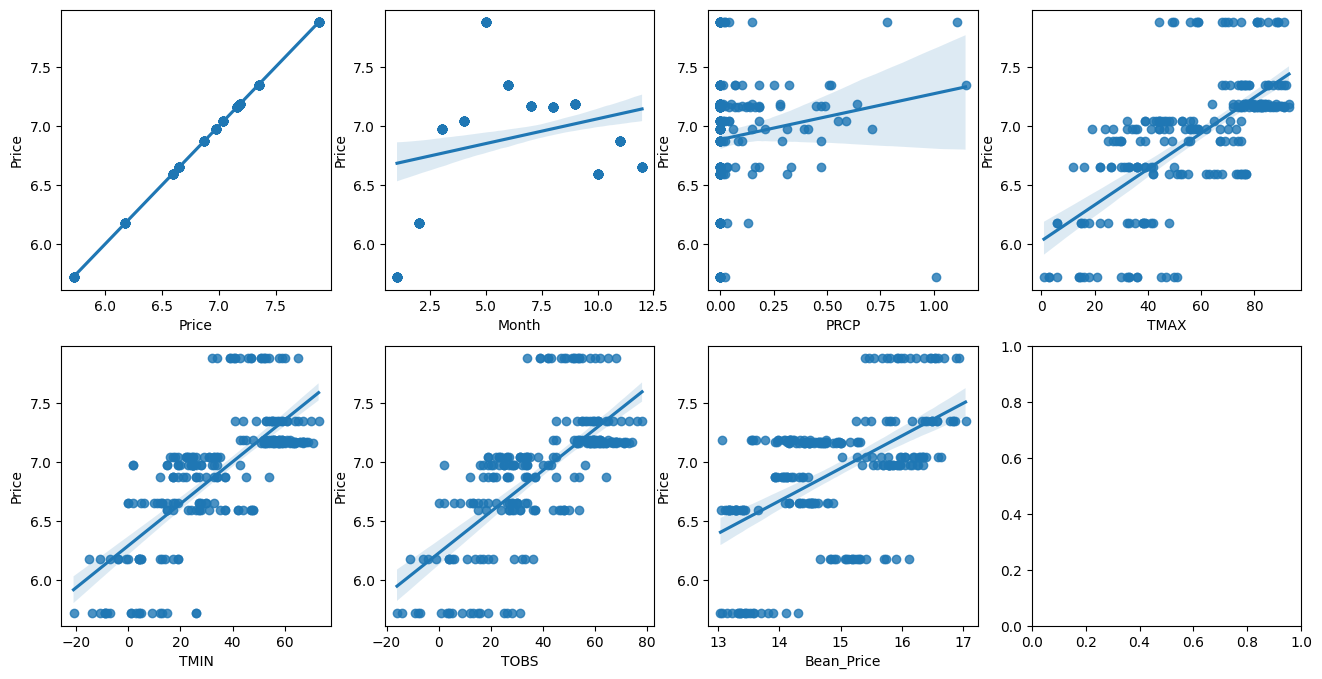

In [20]:
# 2x4 subplot 이용. axs는 4x2 
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Price','Month','PRCP','TMAX','TMIN','TOBS', 'Bean_Price']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4
    
    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Price', data=df, ax=axs[row][col])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
        # m_s_e, r2(선형회귀모델 적합도 : 분산값, 1에 가까울수록 적합도 높음)

print(df.head())

# feature, target 데이터 분리
y_target = df['Price'] # 레이블(종속변수)
X_data = df.drop(['Price'], axis=1, inplace=False) # 피처(독립변수)

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=156)

# Linear Regression 
lr = LinearRegression()

# fit 메소드 학습 : 주어진 데이터로 estimator(사이킷런이 제공) 알고리즘 학습 
lr.fit(X_train, y_train)
LinearRegression()
print(X_train.shape, X_test.shape)

# predict 메소드 : 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test) 
y_preds[0:5]
#array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641])
# rmse를 활용한 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

   Price  Month  PRCP  TMAX  TMIN  TOBS  Bean_Price
0   5.72      1   0.0   1.0  -9.0  -9.0     13.0389
1   5.72      1   0.0  15.0  -9.0   4.0     13.3738
2   5.72      1   0.0  36.0   4.0  25.0     13.4361
3   5.72      1   0.0  36.0   4.0   4.0     13.3596
4   5.72      1   0.0  14.0  -7.0  -7.0     13.5789
(172, 6) (74, 6)
MSE : 0.081, RMSE: 0.284
Variance score : 0.748


In [31]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))  



절편 값: 1.6469385894470312
회귀계수: [ 0.1 -0.2  0.   0.  -0.   0.3]


In [32]:
# 회귀계수 정렬 (내림차순, 큰 값부터)
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

Bean_Price    0.3
Month         0.1
TMAX          0.0
TMIN          0.0
TOBS         -0.0
PRCP         -0.2
dtype: float64

In [33]:
from sklearn.model_selection import cross_val_score

# features, target 데이터 정의 
y_target = df['Price']
X_data = df.drop(['Price'], axis=1)

# 선형회귀 객체 생성
lr = LinearRegression()
lr
LinearRegression()
# 5 folds 의 개별 Negative MSE scores (음수로 만들어 작은 오류 값이 더 큰 숫자로 인식됨)
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    # cv는 교차검증의 폴드 수
neg_mse_scores

array([-0.51358371, -0.22349107, -0.1029356 , -0.02520977, -0.13059915])

In [34]:
# RMSE를 구하기 위해선 MSE 값에 -1을 곱한 후 평균을 내면 된다
rmse_scores =  np.sqrt(-1*neg_mse_scores)
rmse_scores
# cross_val_score() # shift + tab, tab 으로 함수 확인

array([0.71664755, 0.47274842, 0.32083578, 0.15877584, 0.36138504])

In [35]:
# 5 fold 의 평균 RMSE
avg_rmse = np.mean(rmse_scores)
avg_rmse

0.4060785270951529

In [37]:
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds, each Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds, each RMSE scores : ', np.round(rmse_scores, 2))
print(f' 5 fold avg RMSE : {avg_rmse:.3f}')

 5 folds, each Negative MSE scores:  [-0.51 -0.22 -0.1  -0.03 -0.13]
 5 folds, each RMSE scores :  [0.72 0.47 0.32 0.16 0.36]
 5 fold avg RMSE : 0.406


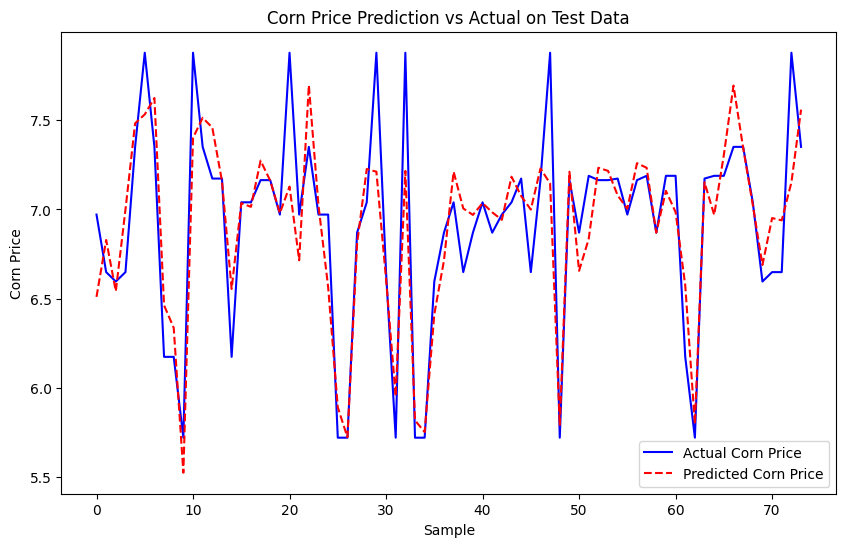

In [41]:
# 테스트 데이터에 대한 예측 수행
y_test_preds = lr.predict(X_test)

# 실제 값과 예측 값의 비교 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Corn Price', color='blue')
plt.plot(y_test_preds, label='Predicted Corn Price', color='red', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Corn Price')
plt.title('Corn Price Prediction vs Actual on Test Data')
plt.legend()
plt.show()
